## Credit Card Clustering - Complete Notebook
Below is the complete notebook of my credit card clustering project I originally completed on Kaggle.

In [291]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage

import os
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

import warnings
warnings.filterwarnings('ignore')

In [292]:
#PATH = "/kaggle/input/ccdata/" Not needed in local notebook
df = pd.read_csv("CC GENERAL.csv")
data = df.copy()
data.columns = data.columns.str.lower()

In [293]:
data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [294]:
data.shape

(8950, 18)

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [296]:
data.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [297]:
data.isnull().sum().sort_values(ascending=False)

minimum_payments                    313
credit_limit                          1
cust_id                               0
balance                               0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
cash_advance_frequency                0
purchases_installments_frequency      0
oneoff_purchases_frequency            0
purchases_frequency                   0
cash_advance                          0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
tenure                                0
dtype: int64

## EDA

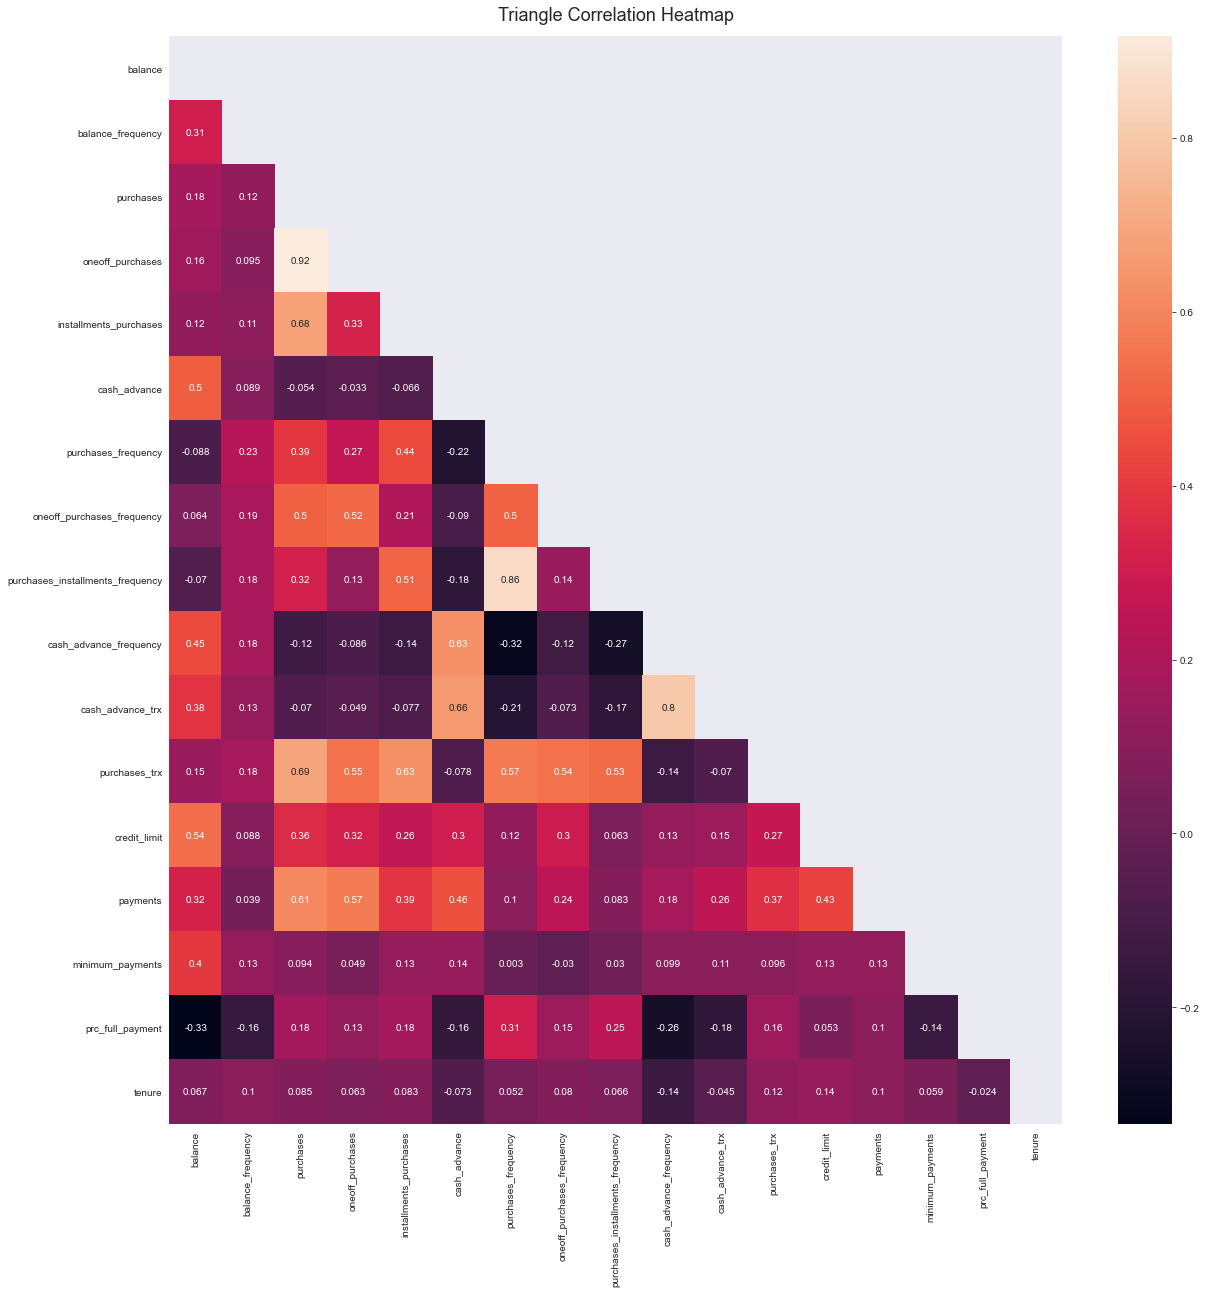

In [344]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

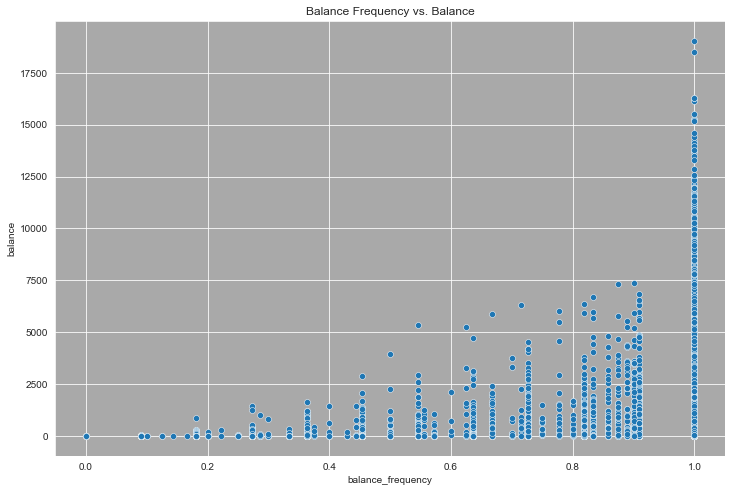

In [346]:
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='balance_frequency', y='balance', data=data)
g.set_title('Balance Frequency vs. Balance')
plt.show()

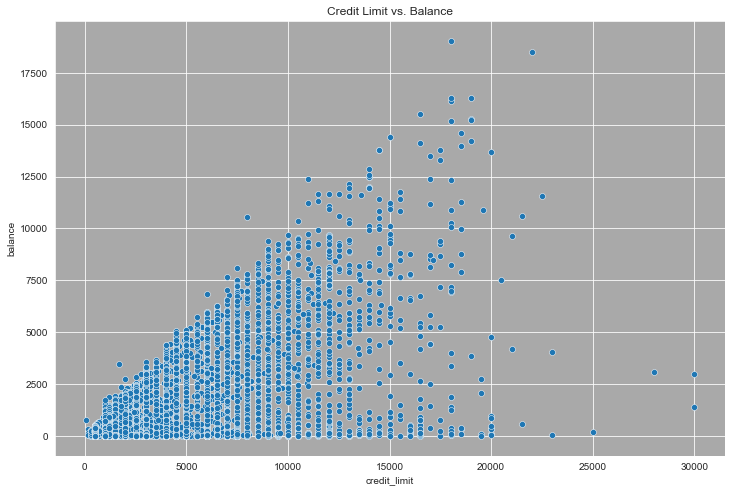

In [347]:
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='credit_limit', y='balance', data=data)
g.set_title('Credit Limit vs. Balance')
plt.show()

We can see some correlation between credit limit and balance, so those with a higher credit limit are generally spending more.

In [301]:
o_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

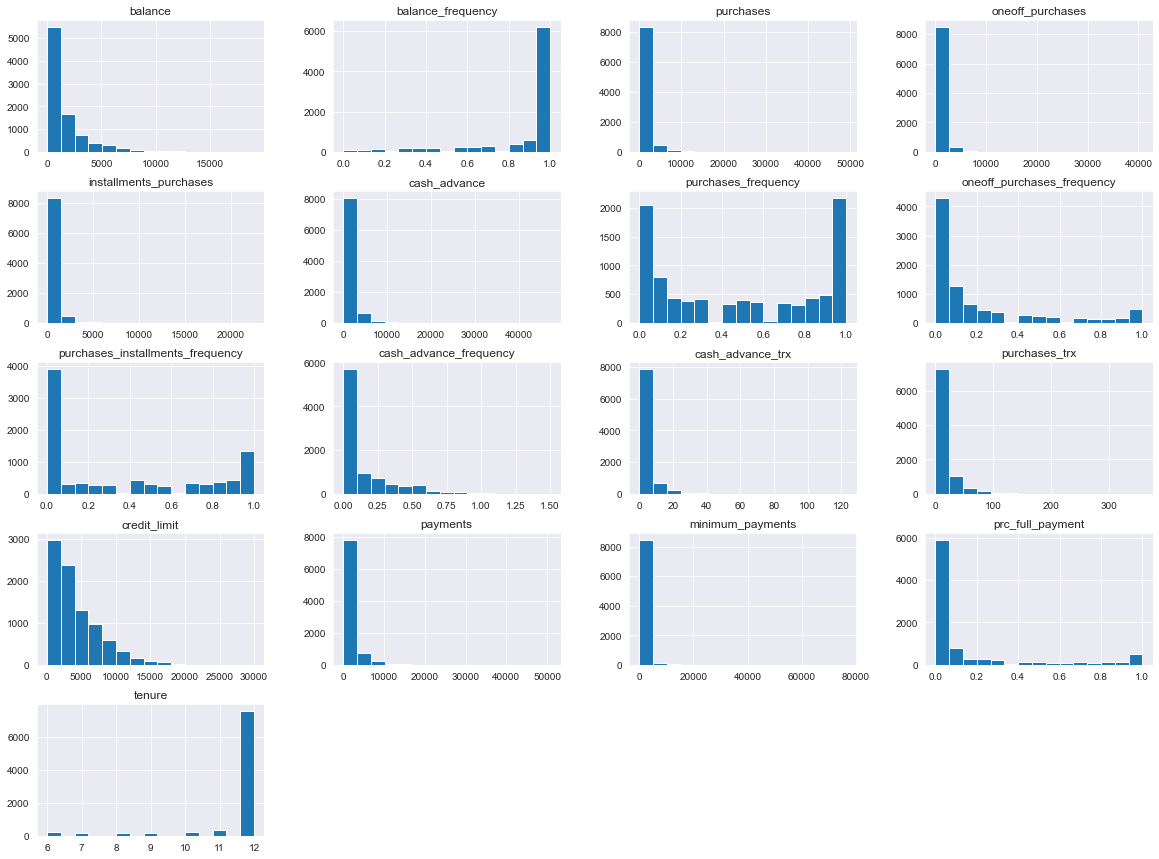

In [302]:
data[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

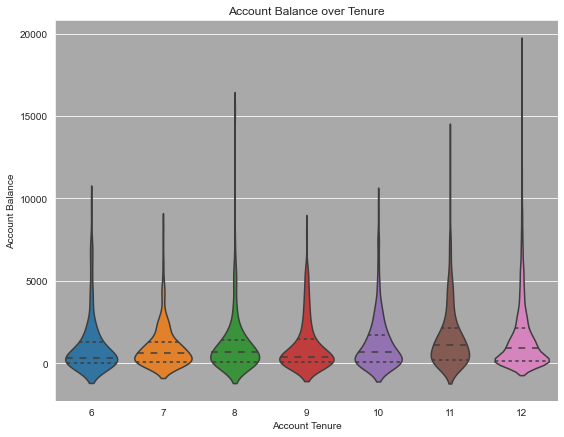

In [303]:
plt.figure(figsize=(9,7))
ax = plt.axes() 
ax.set_facecolor('darkgrey')
sns.violinplot(x='tenure', y='balance', data=data, inner='quartile')
plt.xlabel('Account Tenure')
plt.ylabel('Account Balance')
plt.title('Account Balance over Tenure')
plt.show()

## Data Preparation

In [304]:
#cust_id is not needed for this analysis, so we can drop it here
data.drop(columns='cust_id', inplace=True) #We know each record represents a card holder.

In [305]:
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [306]:
#I chose to drop the na values to maintain genuine data records, and the proportion of missing values
#is so small in virtually one column.
data.dropna(axis='index', inplace=True)

In [307]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [308]:
hier_cluster = linkage(data_scaled, method='ward')

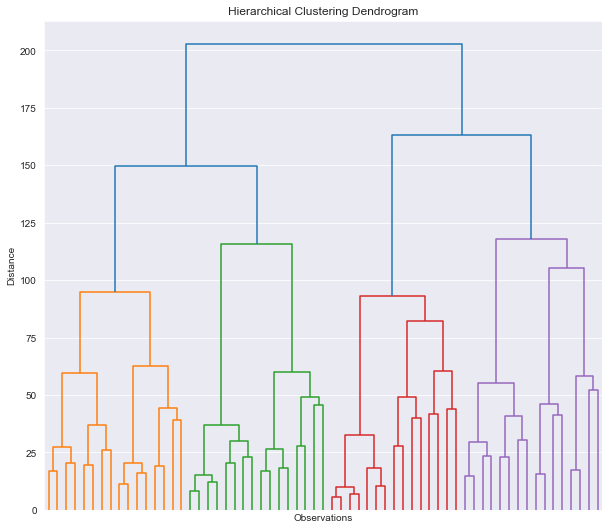

In [309]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

The easiest observation from our dendrogram is having around 4 clades. Above a height of 125, if draw a horizontal line, we have 4 general clusters over our data.

## K-Means Clustering + PCA

In [310]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

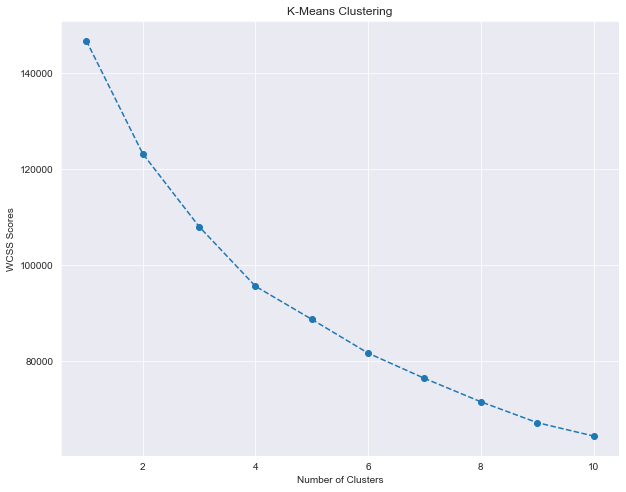

In [311]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.title('K-Means Clustering')
plt.show()

To make a judegement based on the dendrogram and our within cluster sum of squares metric, we can run another kmeans with 4 clusters and plot our result. It's a little more difficult to judge since we don't have a definite 'elbow' here.

In [312]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=3)

In [313]:
data_kmeans = data.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

In [314]:
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
KMeans Segment,,,,,,,,,,,,,,,,,
0,913.099184,0.946169,1264.675431,611.072630,653.884203,218.409256,0.887404,0.302467,0.713691,0.043817,0.815910,22.511429,4254.075054,1373.189779,649.316887,0.274334,11.601036
1,3586.147809,0.986840,7816.070736,5194.559518,2623.034061,658.230083,0.944589,0.737344,0.786971,0.070831,2.098985,90.347716,9775.380711,7454.041676,2016.140976,0.291842,11.949239
2,4655.121148,0.969212,505.501029,319.814377,185.774602,4585.995163,0.290473,0.139730,0.187859,0.487255,14.448097,7.753460,7649.268638,3556.895507,2037.975309,0.035326,11.385813
3,1061.245064,0.818901,273.943703,210.942878,63.279848,606.661232,0.174488,0.087724,0.083122,0.119162,2.211038,2.997898,3259.159877,1013.575184,573.842255,0.084056,11.479106


Based on these different segments of groups, we can attempt to make inferences on the groups and assign names to them. 

It may be difficult depending on the values the application of KMeans returns. Since completing this on Kaggle, I decided to do more research on the terms used in the dataset in order to make the best decisions on segment names I can.

Since Cash Advance relates to credit card usage by withdrawing cash which usually incurs a fee and has an interest rate.

In [315]:
#Can contort names again if we dig out more granular details. Segment 2 also has high minimum purchases.

#Middle Ground seems to be within the range of the other 3 segments, which inspired its name.

data_transf_kmeans.rename({0:'Middle Ground', 1:'High Credit Frequent Purchasers', 2:'High Cash Advance Users', 3:'Frugal Credit Users'})

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
KMeans Segment,,,,,,,,,,,,,,,,,
Middle Ground,913.099184,0.946169,1264.675431,611.072630,653.884203,218.409256,0.887404,0.302467,0.713691,0.043817,0.815910,22.511429,4254.075054,1373.189779,649.316887,0.274334,11.601036
High Credit Frequent Purchasers,3586.147809,0.986840,7816.070736,5194.559518,2623.034061,658.230083,0.944589,0.737344,0.786971,0.070831,2.098985,90.347716,9775.380711,7454.041676,2016.140976,0.291842,11.949239
High Cash Advance Users,4655.121148,0.969212,505.501029,319.814377,185.774602,4585.995163,0.290473,0.139730,0.187859,0.487255,14.448097,7.753460,7649.268638,3556.895507,2037.975309,0.035326,11.385813
Frugal Credit Users,1061.245064,0.818901,273.943703,210.942878,63.279848,606.661232,0.174488,0.087724,0.083122,0.119162,2.211038,2.997898,3259.159877,1013.575184,573.842255,0.084056,11.479106


In [316]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Middle Ground', 1:'High Credit Frequent Purchasers', 
                                                           2:'High Cash Advance Users', 3:'Frugal Credit Users'})

In [317]:
data_kmeans.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,KMeans Segment,Labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,3,Frugal Credit Users
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,High Cash Advance Users
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0,Middle Ground
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,3,Frugal Credit Users
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0,Middle Ground


### KMeans Segment Analysis
We can further assert our KMeans segments by plotting attributes that KMeans split our data on and look at the differences between customer segments.

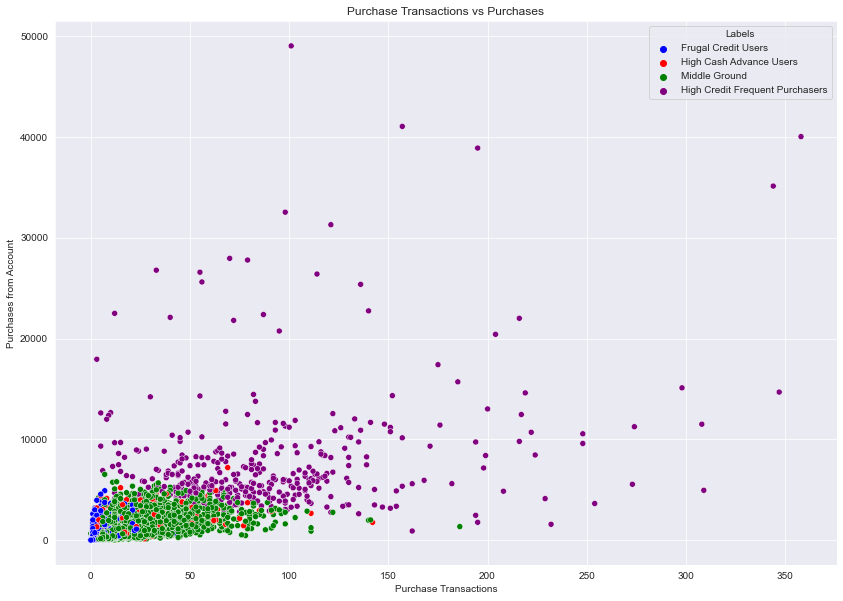

In [318]:
#now we can illustrate the groups based on a few features in a scatterplot
plt.figure(figsize=(14,10))
X = data_kmeans['purchases_trx']
Y = data_kmeans['purchases']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Purchase Transactions')
g.set_ylabel('Purchases from Account')
g.set_title('Purchase Transactions vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

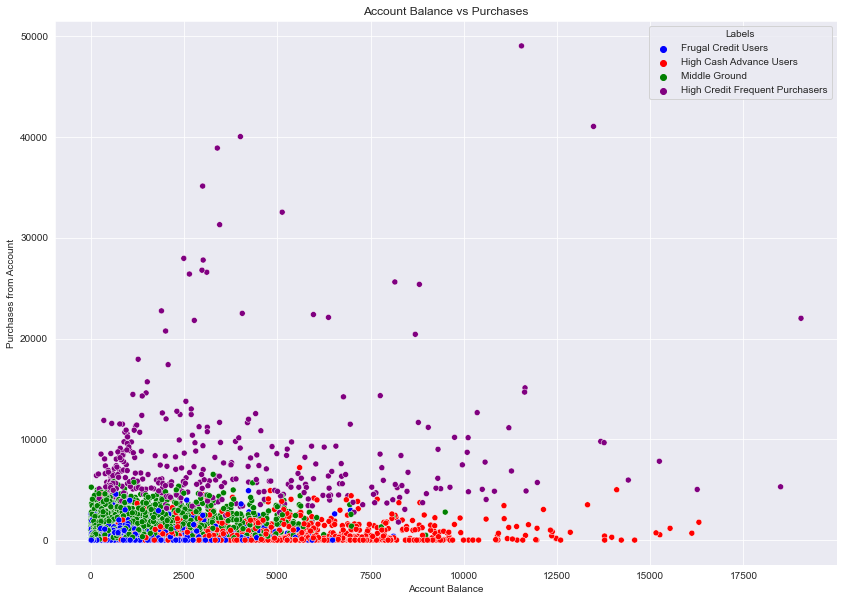

In [319]:
plt.figure(figsize=(14,10))
X = data_kmeans['balance']
Y = data_kmeans['purchases']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Account Balance')
g.set_ylabel('Purchases from Account')
g.set_title('Account Balance vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

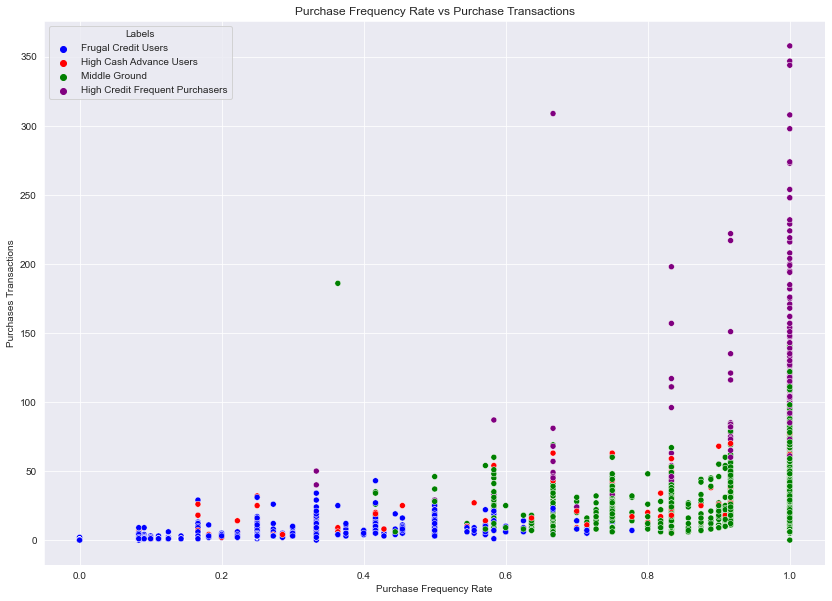

In [320]:
plt.figure(figsize=(14,10))
X = data_kmeans['purchases_frequency']
Y = data_kmeans['purchases_trx']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Purchase Frequency Rate')
g.set_ylabel('Purchases Transactions')
g.set_title('Purchase Frequency Rate vs Purchase Transactions')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

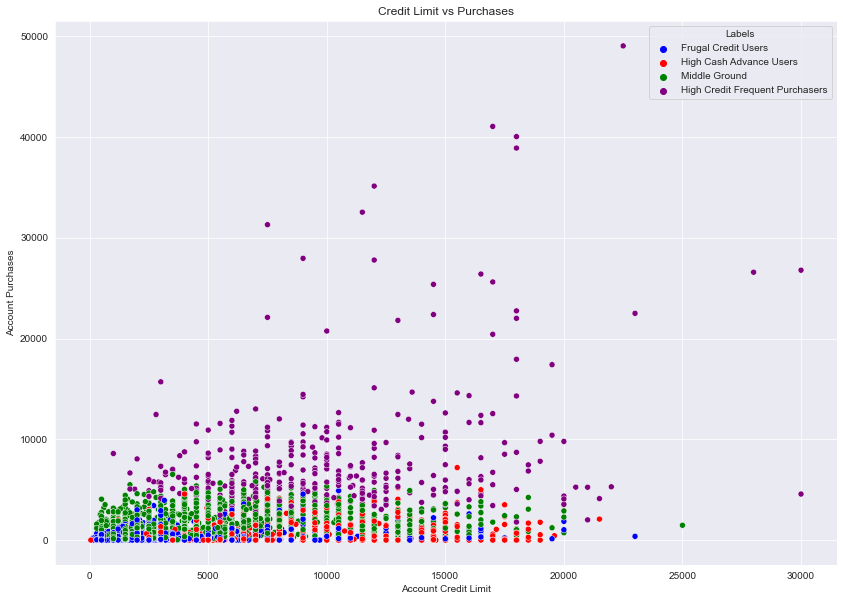

In [321]:
plt.figure(figsize=(14,10))
X = data_kmeans['credit_limit']
Y = data_kmeans['purchases']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Account Credit Limit')
g.set_ylabel('Account Purchases')
g.set_title('Credit Limit vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

## PCA

In [322]:
pca = PCA()
pca.fit(data_scaled)
pca.explained_variance_ratio_

array([2.72311770e-01, 2.03743076e-01, 8.91833372e-02, 7.57360860e-02,
       6.27661816e-02, 5.71278613e-02, 4.91618788e-02, 4.21073427e-02,
       3.68169669e-02, 3.08150790e-02, 2.36380362e-02, 1.77453962e-02,
       1.42671026e-02, 1.17865972e-02, 1.00809717e-02, 2.71162672e-03,
       6.90045972e-07])

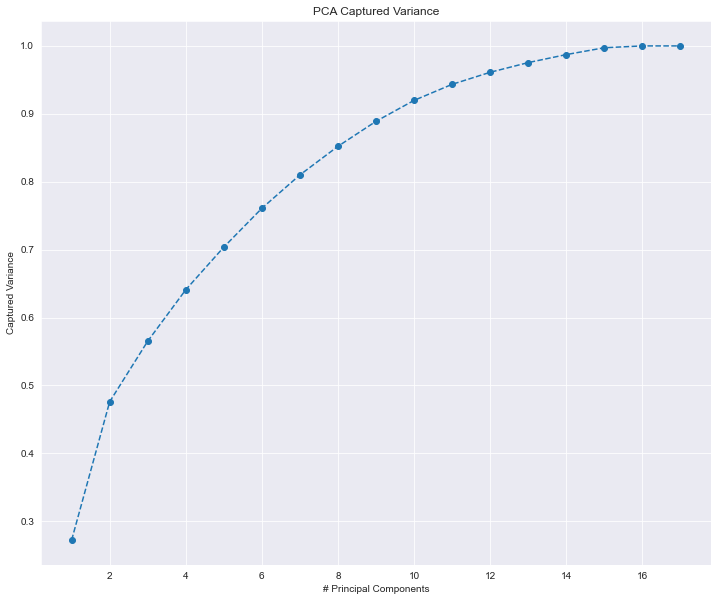

In [323]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

We got a considerable number of components, and like our KMeans algorirthm, no crystalized cutoff. We can try setting the bar at 80% variance and keep 7 of the components to keep from our analysis here and continue.

In [324]:
#so now we'll run PCA again with our chosen number of principal components:
pca = PCA(n_components=7, random_state = 3)
pca.fit(data_scaled)
pca.components_

array([[ 0.0919859 ,  0.10981218,  0.41215123,  0.34677536,  0.33705564,
        -0.03058765,  0.32366488,  0.29476135,  0.27722626, -0.09914541,
        -0.05696036,  0.39106653,  0.21005184,  0.26372547,  0.05932632,
         0.13056503,  0.07791867],
       [ 0.4059787 ,  0.12773873,  0.0495303 ,  0.06992965, -0.01148132,
         0.43724688, -0.1865817 , -0.01474658, -0.17357691,  0.42999689,
         0.41641184, -0.0119466 ,  0.24382309,  0.26418176,  0.17041577,
        -0.1957089 , -0.00456558],
       [-0.17415522, -0.45885334,  0.24258187,  0.3685726 , -0.10375304,
        -0.00172594, -0.35574976,  0.10474308, -0.44994026, -0.08763546,
        -0.08705192, -0.07979903,  0.0951819 ,  0.28792071, -0.24870622,
         0.18419598, -0.06574319],
       [ 0.25942307,  0.15932011,  0.06400168,  0.12314791, -0.07502838,
        -0.26556462, -0.221738  ,  0.05546399, -0.26529256, -0.26659223,
        -0.33264408, -0.0241064 ,  0.12272574, -0.09751655,  0.35220392,
        -0.41815027

In [325]:
#now we make a new dataframe with these components
#and set the columns to the original columns of our data
data_pca = pd.DataFrame(data = pca.components_,
                           columns = data.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'])
data_pca

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
Component 1,0.091986,0.109812,0.412151,0.346775,0.337056,-0.030588,0.323665,0.294761,0.277226,-0.099145,-0.056960,0.391067,0.210052,0.263725,0.059326,0.130565,0.077919
Component 2,0.405979,0.127739,0.049530,0.069930,-0.011481,0.437247,-0.186582,-0.014747,-0.173577,0.429997,0.416412,-0.011947,0.243823,0.264182,0.170416,-0.195709,-0.004566
Component 3,-0.174155,-0.458853,0.242582,0.368573,-0.103753,-0.001726,-0.355750,0.104743,-0.449940,-0.087635,-0.087052,-0.079799,0.095182,0.287921,-0.248706,0.184196,-0.065743
Component 4,0.259423,0.159320,0.064002,0.123148,-0.075028,-0.265565,-0.221738,0.055464,-0.265293,-0.266592,-0.332644,-0.024106,0.122726,-0.097517,0.352204,-0.418150,0.428374
Component 5,0.075700,-0.450859,-0.010410,-0.197021,0.337489,0.099425,-0.088538,-0.521560,0.175408,-0.159932,-0.089743,-0.052523,0.132001,0.189192,0.416811,0.201097,0.117787
Component 6,0.035763,-0.014653,0.195992,0.173006,0.145431,-0.132511,-0.085693,-0.096828,-0.047460,0.031548,-0.089787,0.078138,-0.312865,-0.065652,0.340276,-0.288661,-0.745661
Component 7,-0.263369,0.098675,0.201357,0.112734,0.268972,-0.038540,-0.157901,-0.305746,0.043229,0.137316,0.196701,0.104231,-0.543884,0.168795,-0.204179,-0.280359,0.400662


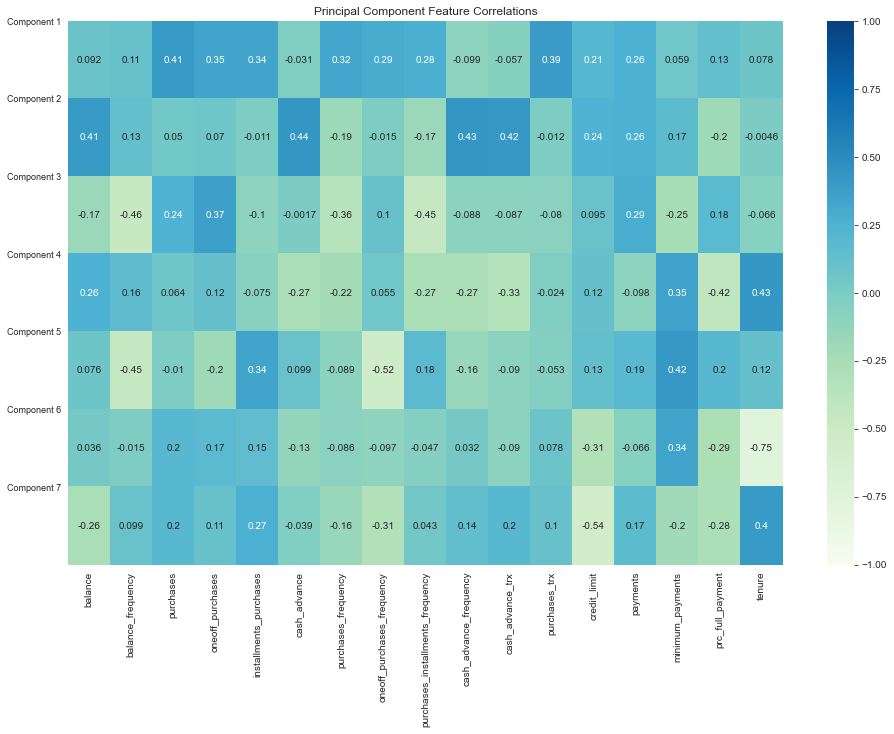

In [326]:
#We can make another heatmap to graph out the components:
plt.figure(figsize=(16,10))
sns.heatmap(data_pca, vmin=-1, vmax=1, cmap='GnBu', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'],rotation=0, fontsize=9)
plt.show()

In [327]:
pca_scores = pca.transform(data_scaled)
pca_scores

array([[-1.69639528, -1.12258398,  0.49156157, ...,  0.07983049,
         0.11823378,  0.80899271],
       [-1.21568083,  2.43563777,  0.69465785, ...,  0.80301878,
        -0.9177772 , -0.32296908],
       [ 0.93585329, -0.38520157, -0.02595329, ..., -1.98728533,
        -0.68213931, -1.62472141],
       ...,
       [-0.93002625, -1.84123564, -0.35003709, ..., -0.21949247,
         3.0902687 , -1.42175665],
       [-2.35600968, -0.71873015,  1.04852241, ..., -0.55268973,
         3.33345233, -0.9968098 ],
       [-0.59681823, -0.44601943,  1.10524573, ..., -1.93090587,
         3.48494524, -1.55074737]])

In [328]:
pca_scores.shape

(8636, 7)

Next we perform KMeans clustering again on this data on the transformed components from PCA.

In [329]:
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

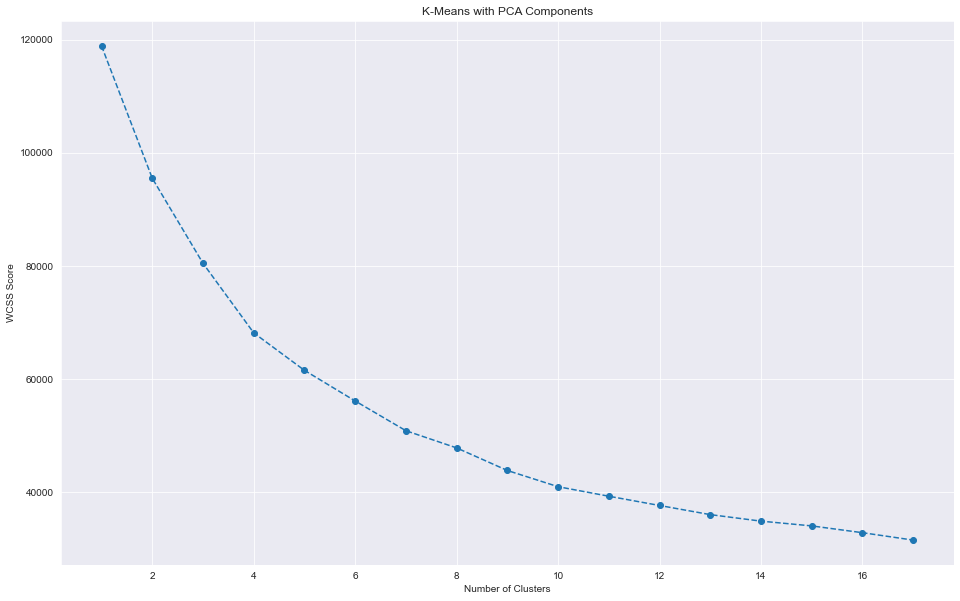

In [330]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.title('K-Means with PCA Components')
plt.show()

I'll go with 4 clusters here, as the steps after the 4th cluster are quite small, so we'll try to capture the most with the smallest amount of clusters possible. It does happen to be in line with the amount of groups we originally chose.

In [331]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=3)

In [332]:
data_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
data_pca_kmeans.columns.values[-7:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']

data_pca_kmeans['K-Means PCA Segment'] = kmeans_pca.labels_
data_pca_kmeans

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,K-Means PCA Segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,2
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,2
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,0
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,0
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,2


Nowe we have a dataframe with the original features, a fixed amount of PCA components, and their segment label according to the KMeans clustering applied to a fixed amount of groups.

In [333]:
#Now, like before, we'll group by the segments and get the mean of all the features and components.

data_pca_kmeans_freq = data_pca_kmeans.groupby(['K-Means PCA Segment']).mean()
data_pca_kmeans_freq

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,,,,
0,990.778467,0.953119,1418.195477,710.202489,708.182571,222.643152,0.898627,0.324157,0.725638,0.044075,0.825440,24.833940,4466.399591,1494.245892,654.826907,0.278291,11.629326,1.148481,-1.058366,-0.659551,-0.303295,-0.112337,-0.181668,-0.162059
1,4621.203308,0.969096,516.336183,324.149129,192.273877,4572.893030,0.291264,0.140090,0.189309,0.485967,14.409906,7.929974,7615.674249,3584.465746,2006.563740,0.036455,11.380017,-0.540275,3.472094,-0.346990,-0.465064,0.074431,-0.247491,-0.275598
2,1046.388687,0.818126,282.505081,214.406665,68.446095,586.353097,0.188966,0.089866,0.095017,0.116155,2.144902,3.221569,3247.279155,1000.650042,590.353761,0.086577,11.472783,-1.312771,-0.237842,0.566133,0.353661,0.053029,0.162393,0.172263
3,4103.123637,0.983756,9589.298411,6457.247713,3134.376279,787.038250,0.941414,0.754892,0.780614,0.075904,2.453488,101.286822,10526.744186,9208.348429,2509.291664,0.300735,11.957364,7.699368,1.360899,1.409325,0.619251,0.292155,0.979781,0.707293


Now that we have applied KMeans again, this time with the PCA compoenents, we have to choose appropriate names again.

The attributes follow about the same patterns as the data without the PCA components, so I will elect to use the same segment names as before here.

In [334]:
#We obtain the number of observations as well as the proportion of observations within each segment

data_pca_kmeans_freq['Obs.'] = data_pca_kmeans[['K-Means PCA Segment', 'balance']].groupby(['K-Means PCA Segment']).count()
data_pca_kmeans_freq['Obs. Prop.'] = data_pca_kmeans_freq['Obs.'] / data_pca_kmeans_freq['Obs.'].sum()
data_pca_kmeans_freq = data_pca_kmeans_freq.rename({0:'Middle Ground', 1:'High Cash Advance Users', 2:'Frugal Credit Users', 3:'High Credit Frequent Purchasers'})
data_pca_kmeans_freq

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Obs.,Obs. Prop.
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,,,,,,
Middle Ground,990.778467,0.953119,1418.195477,710.202489,708.182571,222.643152,0.898627,0.324157,0.725638,0.044075,0.825440,24.833940,4466.399591,1494.245892,654.826907,0.278291,11.629326,1.148481,-1.058366,-0.659551,-0.303295,-0.112337,-0.181668,-0.162059,3294,0.381427
High Cash Advance Users,4621.203308,0.969096,516.336183,324.149129,192.273877,4572.893030,0.291264,0.140090,0.189309,0.485967,14.409906,7.929974,7615.674249,3584.465746,2006.563740,0.036455,11.380017,-0.540275,3.472094,-0.346990,-0.465064,0.074431,-0.247491,-0.275598,1171,0.135595
Frugal Credit Users,1046.388687,0.818126,282.505081,214.406665,68.446095,586.353097,0.188966,0.089866,0.095017,0.116155,2.144902,3.221569,3247.279155,1000.650042,590.353761,0.086577,11.472783,-1.312771,-0.237842,0.566133,0.353661,0.053029,0.162393,0.172263,3913,0.453103
High Credit Frequent Purchasers,4103.123637,0.983756,9589.298411,6457.247713,3134.376279,787.038250,0.941414,0.754892,0.780614,0.075904,2.453488,101.286822,10526.744186,9208.348429,2509.291664,0.300735,11.957364,7.699368,1.360899,1.409325,0.619251,0.292155,0.979781,0.707293,258,0.029875


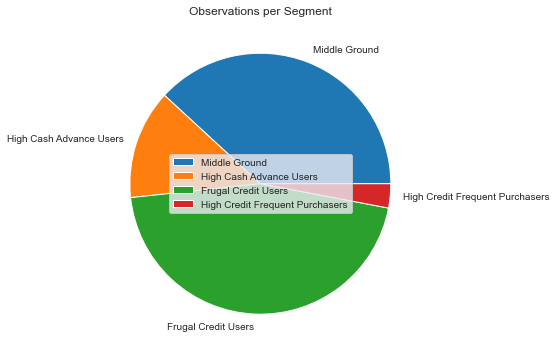

In [335]:
data_pca_kmeans_freq.plot.pie(y='Obs.', figsize=(6, 6))
plt.legend(loc='center')
plt.ylabel(None, loc='center')
plt.title('Observations per Segment')
plt.show()

We can seen the segments we have found have differing amounts of records. The order of the groups have been altered since we incorporated PCA components based on our KMeans clustering.

Let's now plot some of the PCA components against each other and color by the KMeans segments below:

In [336]:
data_pca_kmeans['Legend'] = data_pca_kmeans['K-Means PCA Segment'].map({0:'Middle Ground', 1:'High Cash Advance Users', 2:'Frugal Credit Users', 3:'High Credit Frequent Purchasers'})

We have several PCA components, so it would be a little cumbersome to plot and keep all possible combinations of components here.

Therefore, I'll plot selected components.

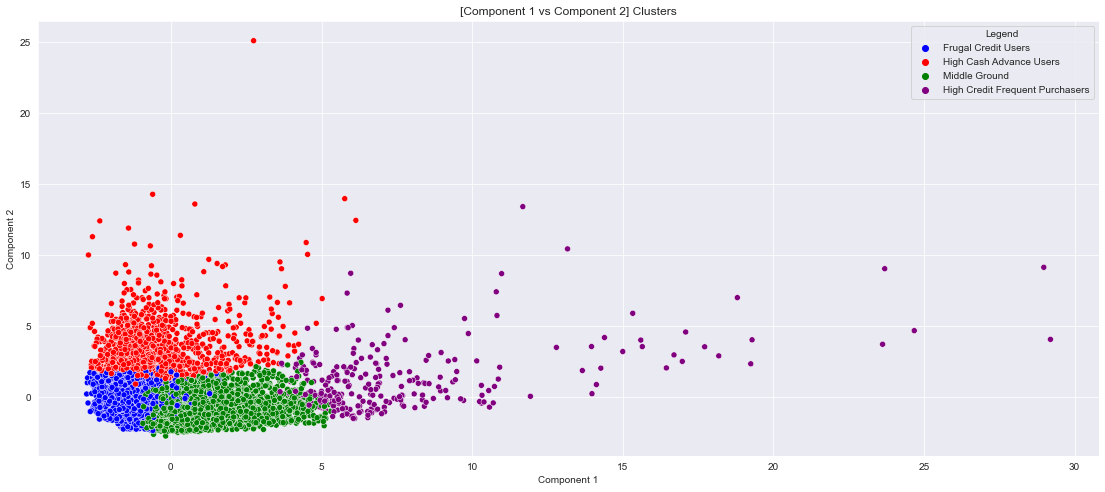

In [337]:
X = data_pca_kmeans['Component 1']
Y = data_pca_kmeans['Component 2']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 1 vs Component 2] Clusters')
plt.show()

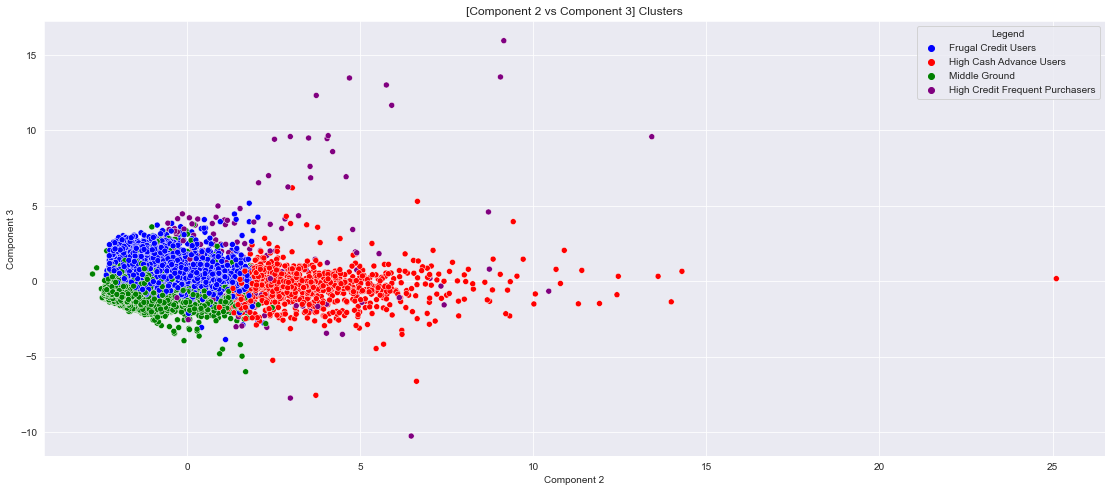

In [338]:
X = data_pca_kmeans['Component 2']
Y = data_pca_kmeans['Component 3']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 2 vs Component 3] Clusters')
plt.show()

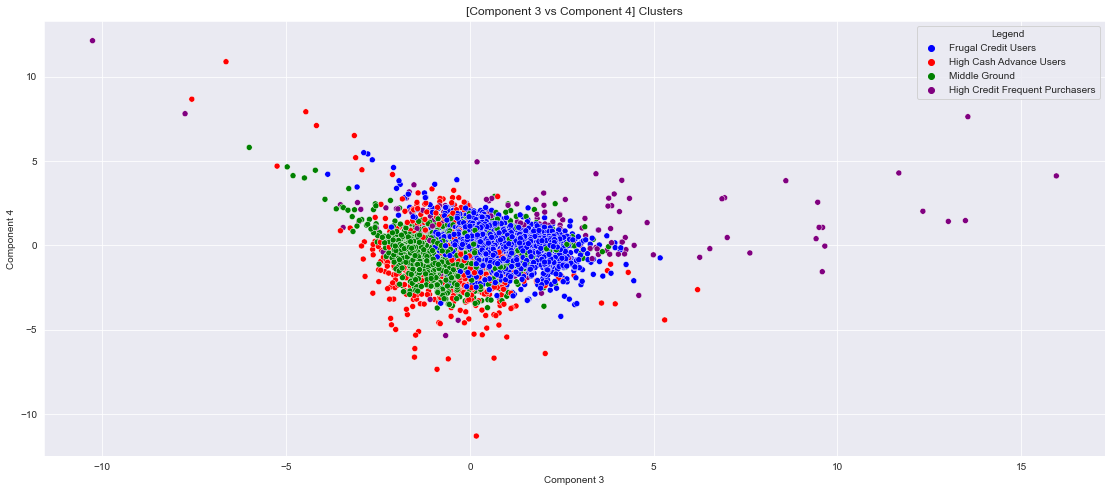

In [339]:
X = data_pca_kmeans['Component 3']
Y = data_pca_kmeans['Component 4']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 3 vs Component 4] Clusters')
plt.show()

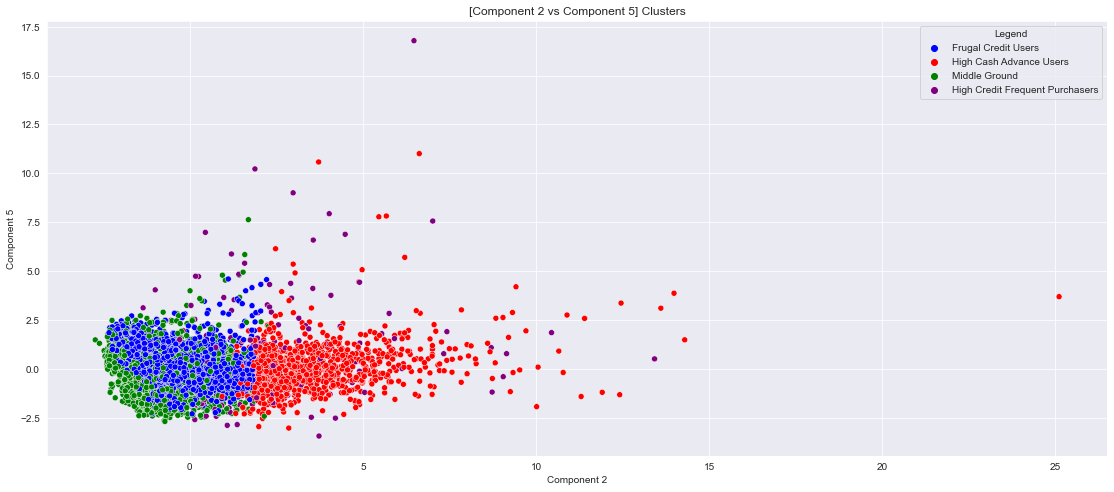

In [340]:
X = data_pca_kmeans['Component 2']
Y = data_pca_kmeans['Component 5']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 2 vs Component 5] Clusters')
plt.show()

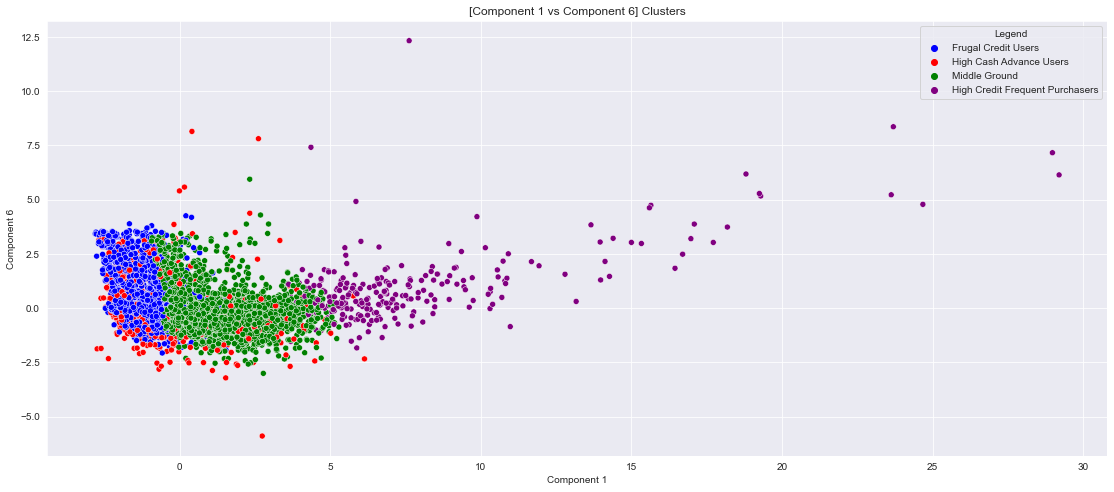

In [341]:
X = data_pca_kmeans['Component 1']
Y = data_pca_kmeans['Component 6']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 1 vs Component 6] Clusters')
plt.show()

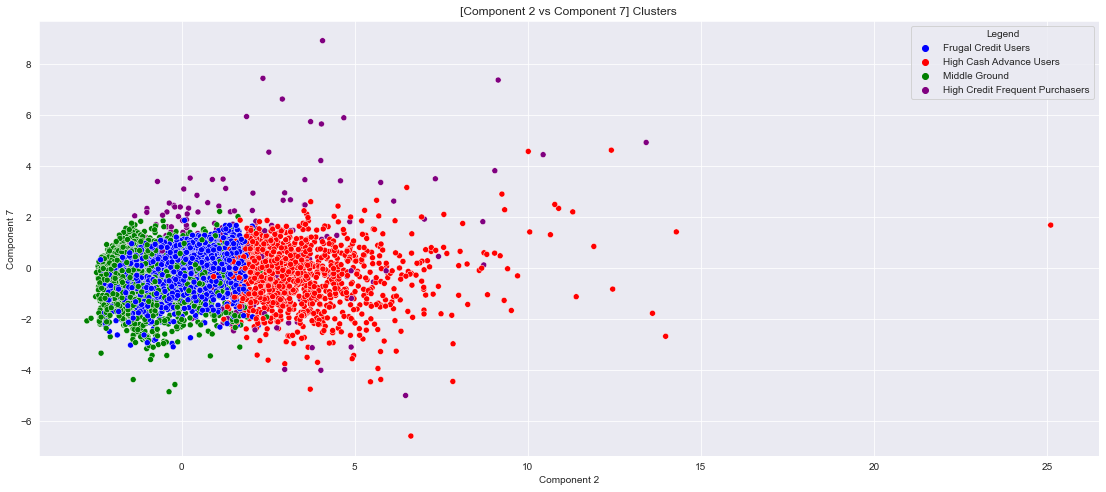

In [342]:
X = data_pca_kmeans['Component 2']
Y = data_pca_kmeans['Component 7']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 2 vs Component 7] Clusters')
plt.show()

## Closing Remarks

* In this notebook, I performed a bit of hierarchical clustering along with KMeans clustering used in unison with PCA. Similar to below, we can see 4 clear distinctions even in this method of clustering.


* I elected to choose 4 clusters from KMeans based on elbow method judgements, and I chose 7 PCA components to retain at least 80% of the captured variance in the data.


* I tried to label each group based upon feature characteristics from the KMeans clusters. One could utilize these groups to form customer segments and act accordingly.


* Since we finished with more than 3 PCA segments, we can't plot all of them onto one graph. We would need a more sophisticated way of visualizing/interpreting all of the components in unison.


* We were able to split our data into 4 clusters. I don't have a very large amount of domain knowledge as far as choosing the best possible names for the clusters, so I did my best based on the attributes after a little research. I noticed some groups had very differing values for cash advance usage, which is linked to credit card usage frequency. I used this nugget of knowledge to aid me in naming the clusters. 

In conclusion, using this knowledge we obtained by applying K-Means with PCA, we were able to segment these customers optimally and can target/market to similar individuals exhibiting similar behavior. 



In [343]:
data_pca_kmeans_freq

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Obs.,Obs. Prop.
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,,,,,,
Middle Ground,990.778467,0.953119,1418.195477,710.202489,708.182571,222.643152,0.898627,0.324157,0.725638,0.044075,0.825440,24.833940,4466.399591,1494.245892,654.826907,0.278291,11.629326,1.148481,-1.058366,-0.659551,-0.303295,-0.112337,-0.181668,-0.162059,3294,0.381427
High Cash Advance Users,4621.203308,0.969096,516.336183,324.149129,192.273877,4572.893030,0.291264,0.140090,0.189309,0.485967,14.409906,7.929974,7615.674249,3584.465746,2006.563740,0.036455,11.380017,-0.540275,3.472094,-0.346990,-0.465064,0.074431,-0.247491,-0.275598,1171,0.135595
Frugal Credit Users,1046.388687,0.818126,282.505081,214.406665,68.446095,586.353097,0.188966,0.089866,0.095017,0.116155,2.144902,3.221569,3247.279155,1000.650042,590.353761,0.086577,11.472783,-1.312771,-0.237842,0.566133,0.353661,0.053029,0.162393,0.172263,3913,0.453103
High Credit Frequent Purchasers,4103.123637,0.983756,9589.298411,6457.247713,3134.376279,787.038250,0.941414,0.754892,0.780614,0.075904,2.453488,101.286822,10526.744186,9208.348429,2509.291664,0.300735,11.957364,7.699368,1.360899,1.409325,0.619251,0.292155,0.979781,0.707293,258,0.029875
